In [6]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append('/home/lucas/Documents/Log_Analysis')
from analog import logextract as logextract
%matplotlib notebook

In [11]:
log_file = 'resistancetestz0.ulg'
info = logextract(log_file,'battery_status')
current = info['battery_current']
time = info['time_bs']
voltage = info['battery_voltage']

<IPython.core.display.Javascript object>


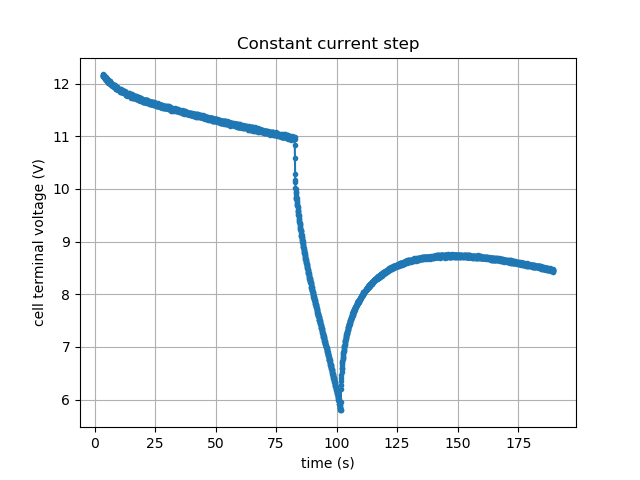

In [12]:
plt.figure()
plt.plot(time,voltage,'.-')
plt.xlabel('time (s)')
plt.ylabel('cell terminal voltage (V)')
plt.title('Constant current step')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


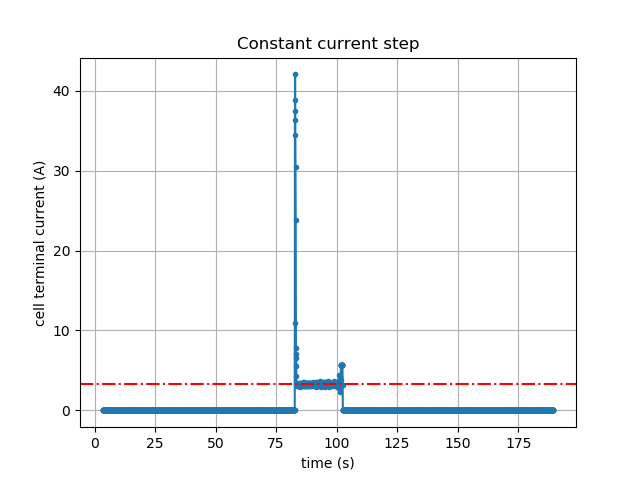

In [13]:
plt.figure()
plt.plot(time,current,'.-')
plt.axhline(3.3,color='r',linestyle='-.')
plt.xlabel('time (s)')
plt.ylabel('cell terminal current (A)')
plt.title('Constant current step')
plt.grid()
plt.show()

In [34]:
current[1866:1896]

array([3.44     , 3.71     , 3.0800002, 4.41     , 4.2      , 3.38     ,
       3.3600001, 3.4099998, 2.3      , 3.12     , 3.86     , 4.3599997,
       3.03     , 3.85     , 5.6299996, 5.6299996, 5.6299996, 5.6299996,
       5.6299996, 5.6299996, 5.6299996, 5.6299996, 5.6299996, 5.6299996,
       5.6299996, 5.6299996, 5.6299996, 5.6299996, 3.19     , 0.       ],
      dtype=float32)

In [36]:
voltage[1866:1896]

array([5.9748044, 5.9675536, 5.9167967, 5.909546 , 5.8660398, 5.895044 ,
       5.895044 , 5.837036 , 5.858789 , 5.829785 , 5.829785 , 5.808032 ,
       5.79353  , 5.8007812, 5.9603024, 6.1923337, 6.2793455, 6.344604 ,
       6.417114 , 6.4678707, 6.5258784, 6.5766354, 6.5911374, 6.6056395,
       6.6563964, 6.699902 , 6.714404 , 6.736157 , 6.772412 , 6.786914 ],
      dtype=float32)

In [39]:
dv0 = voltage[1896]-voltage[1866]
di = current[1866]-current[1896]
print(di)

3.44


In [40]:
R0 = dv0/di
print(f'R0 = {R0} Ohm')

R0 = 0.2424018234014511 Ohm


In [41]:
vss = np.mean(voltage[time>300])
dvss = vss - voltage[59]
R1 = (dvss - dv0)/di
print(f'R1 = {R1} Ohm')
print(R0+R1)

R1 = nan Ohm
nan


/home/lucas/anaconda3/envs/analysis/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/lucas/anaconda3/envs/analysis/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [253]:
time.index[time>250]

Int64Index([136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
            149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
            162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
            175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
            188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
            201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
            214, 215, 216, 217, 218, 219],
           dtype='int64')

In [256]:
dtime = time[136]-time[59]

In [272]:
C1 = dtime/(5*R1)
print(f'C1 = {C1/1e3} kF')

C1 = 3.9050147796611308 kF


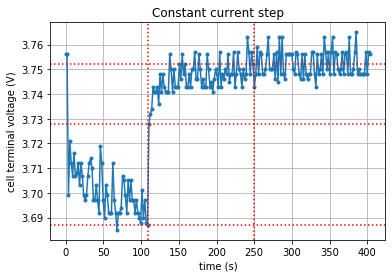

In [258]:
plt.figure()
plt.plot(time,voltage,'.-')
plt.axhline(voltage[59],color='r',linestyle=':')
plt.axhline(voltage[60],color='r',linestyle=':')
plt.axhline(vss,color='r',linestyle=':')
plt.axvline(time[59],color='r',linestyle=':')
plt.axvline(time[136],color='r',linestyle=':')
plt.xlabel('time (s)')
plt.ylabel('cell terminal voltage (V)')
plt.title('Constant current step')
plt.grid()
plt.show()

In [263]:
dt = np.mean(np.diff(time))
Q = 7000 # mAh
z0 = 0.39

In [264]:
z = []
z.append(z0)
i1 = [] 
i1.append(0)

i = current

for k in range(len(time)-1):
    z.append(z[k] - dt/Q * i[k])
    i1.append(np.exp(-dt/(R1*C1)) * i1[k] + (1 - np.exp(-dt/(R1*C1)))*i[k])
    v[k] = OCV[z[k]] - R1*i1[k] - R0*i[k]

NameError: name 'OCV' is not defined